In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [ ]:
calls = pd.read_excel('new_Calls.xlsx')

In [ ]:
contacts = pd.read_excel('new_Contacts.xlsx')

In [ ]:
deals = pd.read_excel('new_Deals.xlsx')

In [ ]:
spend = pd.read_excel('new_Spend.xlsx')

**Calculate summary statistics (mean, median, mode, range) for numeric fields.**

**CALLS**

In [ ]:
calls_statistic = calls.describe()
calls_statistic

,Id,Call Start Time,CONTACTID,Call Duration (in seconds)
count,9.587400e+04,95874,9.587400e+04,95874.000000
mean,5.805028e+18,2024-02-05 12:34:44.369484800,5.568283e+18,164.834439
min,5.805028e+18,2023-06-30 08:43:00,1.001000e+03,0.000000
25%,5.805028e+18,2023-11-24 11:07:30,5.805028e+18,4.000000
50%,5.805028e+18,2024-02-19 12:19:30,5.805028e+18,8.000000
75%,5.805028e+18,2024-04-22 19:10:00,5.805028e+18,97.000000
max,5.805028e+18,2024-06-21 15:31:00,5.805028e+18,7625.000000
std,1.584982e+07,NaN,1.148162e+18,401.266369


т.к. в этой таблице я заполняла нулями отсутствующие значения, то смотрю статистику с данными без 0

In [ ]:
median_call_duration = calls[calls['Call Duration (in seconds)'] !=0]['Call Duration (in seconds)'].median()
mode_call_duration = calls[calls['Call Duration (in seconds)'] !=0]['Call Duration (in seconds)'].mode()[0]
range_call_duration = calls['Call Duration (in seconds)'].max() - calls['Call Duration (in seconds)'].min() # для звонков не информативно, т.к. - это max
mean_call_duration = calls[calls['Call Duration (in seconds)'] !=0]['Call Duration (in seconds)'].mean()

print(f"MEDIAN call duration: {median_call_duration}")
print(f"MODE call duration: {mode_call_duration}")
print(f"RANGE call duration: {range_call_duration}")
print(f"MEAN call duration: {mean_call_duration}")

MEDIAN call duration: 21.0
MODE call duration: 5
RANGE call duration: 7625
MEAN call duration: 214.09094234312343


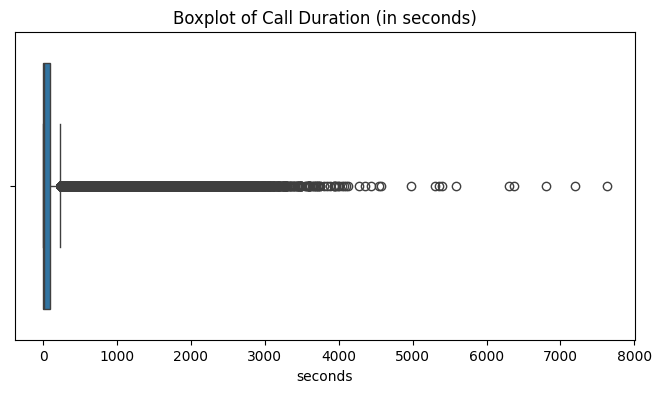

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=calls['Call Duration (in seconds)'])
plt.xlabel('seconds')
plt.title('Boxplot of Call Duration (in seconds)')

plt.show()

The bulk of the data is concentrated near zero, indicating that most calls are of relatively short duration. The average duration of the calls is within the interquartile range (from the bottom to the top of the box).
One can see a large number of outliers to the right of the box. This indicates that there are calls with unusually long durations well above the median values. Such outliers can skew the data analysis

**SPEND**

In [ ]:
spend_statistic = spend.describe()
spend_statistic

,Date,Impressions,Spend,Clicks
count,19862,19862.000000,19862.000000,19862.000000
mean,2024-01-10 18:21:55.879568896,2571.695197,7.528117,25.095912
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-09 00:00:00,1.000000,0.000000,0.000000
50%,2024-01-20 00:00:00,82.000000,0.740000,2.000000
75%,2024-04-12 00:00:00,760.750000,6.160000,13.000000
max,2024-06-21 00:00:00,431445.000000,774.000000,2415.000000
std,NaN,11691.227016,27.325150,87.032314


Since in this table I did not fill missing values with zeros, I leave the statistics with all data.

In [ ]:
median_spend_impressions = spend['Impressions'].median()
mode_spend_impressions = spend['Impressions'].mode()[0]
range_spend_impressions = spend['Impressions'].max() - spend['Impressions'].min()

print(f"MEDIAN spend impressions: {median_spend_impressions}")
print(f"MODE spend impressions: {mode_spend_impressions}")
print(f"RANGE spend impressions: {range_spend_impressions}")

MEDIAN spend impressions: 82.0
MODE spend impressions: 0
RANGE spend impressions: 431445


In [ ]:
median_spend_spend = spend['Spend'].median()
mode_spend_spend = spend['Spend'].mode()[0]
range_spend_spend = spend['Spend'].max() - spend['Spend'].min()

print(f"MEDIAN spend spend: {median_spend_spend}")
print(f"MODE spend spend: {mode_spend_spend}")
print(f"RANGE spend spend: {range_spend_spend}")

MEDIAN spend spend: 0.74
MODE spend spend: 0.0
RANGE spend spend: 774.0


In [ ]:
median_spend_clicks = spend['Clicks'].median()
mode_spend_clicks = spend['Clicks'].mode()[0]
range_spend_clicks = spend['Clicks'].max() - spend['Clicks'].min()

print(f"MEDIAN spend clicks: {median_spend_clicks}")
print(f"MODE spend clicks: {mode_spend_clicks}")
print(f"RANGE spend clicks: {range_spend_clicks}")

MEDIAN spend clicks: 2.0
MODE spend clicks: 0
RANGE spend clicks: 2415


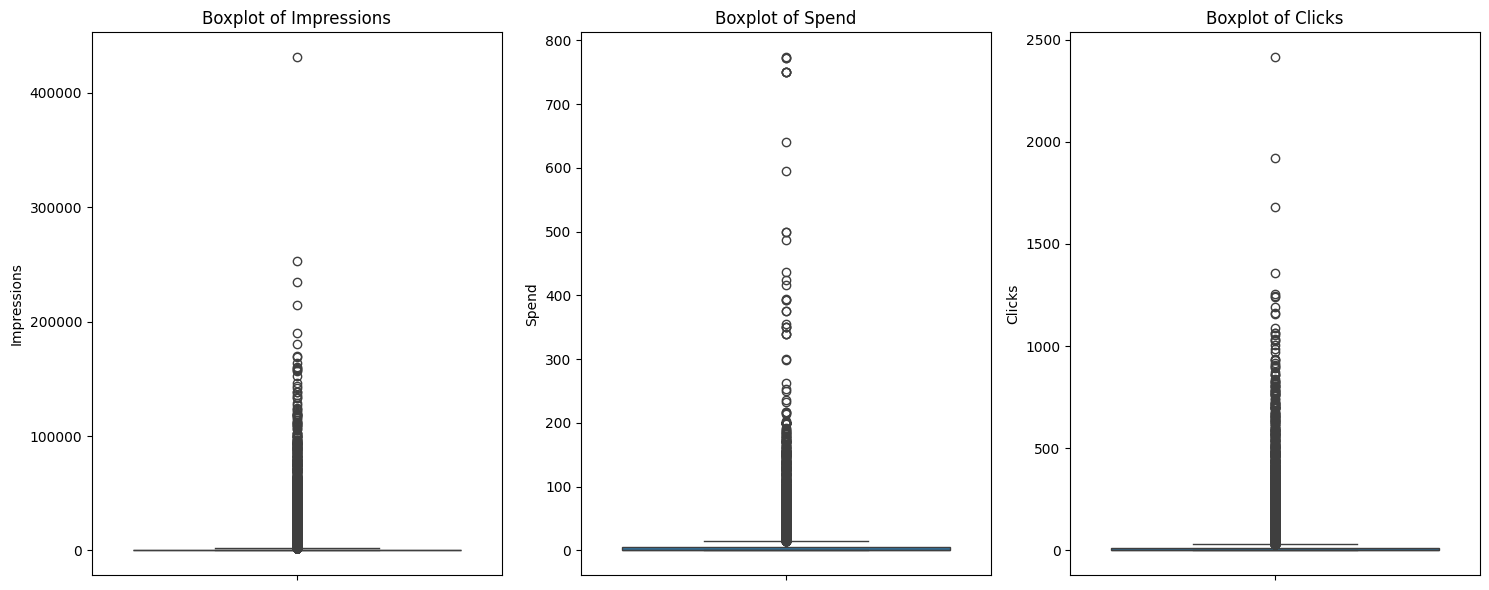

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

data = ['Impressions', 'Spend', 'Clicks']
titles = ['Impressions', 'Spend', 'Clicks']

for i, metric in enumerate(data):
    sns.boxplot(y=spend[metric], ax=axs[i])
    axs[i].set_title(f'Boxplot of {titles[i]}')
    axs[i].set_ylabel(f'{titles[i]}')

plt.tight_layout()

plt.show()

The bulk of the data is concentrated near zero, across all columns that are plotted in the visualization. A large number of outliers are visible. Such outliers can distort the data analysis

**DEALS**

In [ ]:
deals_statistic = deals.describe()
deals_statistic

,Id,Closing Date,SLA,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name
count,2.159000e+04,14643,15533.000000,21590,3587.000000,840.000000,4165.000000,4185.000000,2.159000e+04
mean,5.805028e+18,2024-01-27 17:01:33.669330176,1.340581,2024-01-27 01:51:24.016674560,10.198495,5.442857,950.086915,7128.724253,5.796424e+18
min,5.805028e+18,2022-10-11 00:00:00,0.000035,2023-07-03 17:03:00,6.000000,0.000000,0.000000,0.000000,2.001000e+03
25%,5.805028e+18,2023-11-11 00:00:00,0.050694,2023-11-18 13:33:15,11.000000,3.000000,300.000000,3000.000000,5.805028e+18
50%,5.805028e+18,2024-02-07 00:00:00,0.230255,2024-02-05 08:03:30,11.000000,5.000000,1000.000000,11000.000000,5.805028e+18
75%,5.805028e+18,2024-04-17 00:00:00,0.651829,2024-04-13 19:17:30,11.000000,8.000000,1000.000000,11000.000000,5.805028e+18
max,5.805028e+18,2024-12-11 00:00:00,311.440556,2024-06-21 15:30:00,11.000000,11.000000,11500.000000,11500.000000,5.805028e+18
std,1.569465e+07,NaN,8.533017,NaN,1.834681,2.919920,1422.152577,4636.020784,2.233269e+17


Since in this table I did not fill missing values with zeros, I leave the statistics with all data.

In [ ]:
median_deals_months_of_study = deals['Months of study'].median()
mode_deals_months_of_study = deals['Months of study'].mode()[0]
range_deals_months_of_study = deals['Months of study'].max() - deals['Months of study'].min()

print(f"MEDIAN deals months of study: {median_deals_months_of_study}")
print(f"MODE deals months of study: {mode_deals_months_of_study}")
print(f"RANGE deals months of study: {range_deals_months_of_study}")

MEDIAN deals months of study: 5.0
MODE deals months of study: 6.0
RANGE deals months of study: 11.0


In [ ]:
median_deals_course_duration = deals['Course duration'].median()
mode_deals_course_duration = deals['Course duration'].mode()[0]
range_deals_course_duration = deals['Course duration'].max() - deals['Course duration'].min()

print(f"MEDIAN deals course duration: {median_deals_course_duration}")
print(f"MODE deals course duration: {mode_deals_course_duration}")
print(f"RANGE deals course duration: {range_deals_course_duration}")

MEDIAN deals course duration: 11.0
MODE deals course duration: 11.0
RANGE deals course duration: 5.0


In [ ]:
median_deals_initial_amount_paid = deals['Initial Amount Paid'].median()
mode_deals_initial_amount_paid = deals['Initial Amount Paid'].mode()[0]
range_deals_initial_amount_paid = deals['Initial Amount Paid'].max() - deals['Initial Amount Paid'].min()

print(f"MEDIAN deals initial amount paid: {median_deals_initial_amount_paid}")
print(f"MODE deals initial amount paid: {mode_deals_initial_amount_paid}")
print(f"RANGE deals initial amount paid: {range_deals_initial_amount_paid}")

MEDIAN deals initial amount paid: 1000.0
MODE deals initial amount paid: 1000.0
RANGE deals initial amount paid: 11500.0


In [ ]:
median_deals_offer_total_amount = deals['Offer Total Amount'].median()
mode_deals_offer_total_amount = deals['Offer Total Amount'].mode()[0]
range_deals_offer_total_amount = deals['Offer Total Amount'].max() - deals['Offer Total Amount'].min()

print(f"MEDIAN deals offer total amount: {median_deals_offer_total_amount}")
print(f"MODE deals offer total amount: {mode_deals_offer_total_amount}")
print(f"RANGE deals offer total amount: {range_deals_offer_total_amount}")

MEDIAN deals offer total amount: 11000.0
MODE deals offer total amount: 11000.0
RANGE deals offer total amount: 11500.0


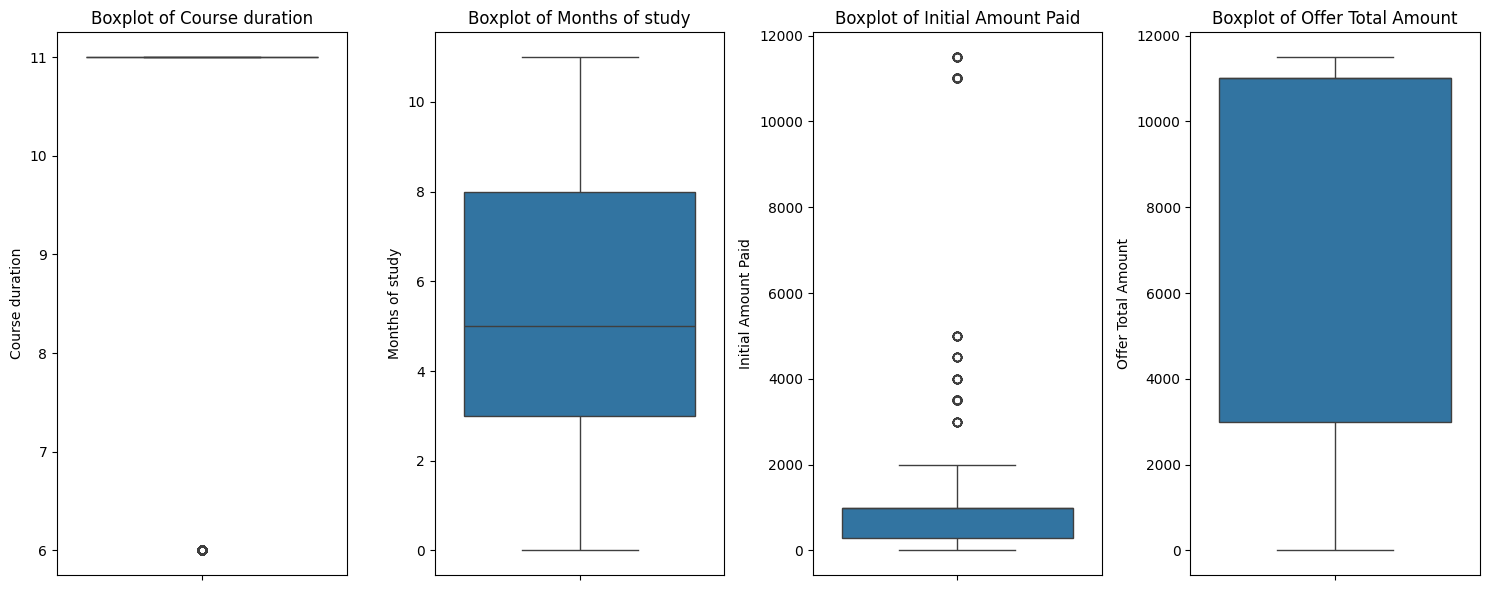

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))

data = ['Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount']
titles = ['Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount']

for i, metric in enumerate(data):
    sns.boxplot(y=deals[metric], ax=axs[i])
    axs[i].set_title(f'Boxplot of {titles[i]}')
    axs[i].set_ylabel(f'{titles[i]}')

plt.tight_layout()

plt.show()

In terms of training duration, the majority of values are 11, the share is 6

Month of training - in the range from 3 to 8

Initial payment - usually 1000, but there are other values, up to 5000.

The cost of the offer ranges from 3000 to 11000.

**Analyze categorical fields such as quality, stage, source, and product**.

We calculate the distribution of categorical values **by Deals**

In [ ]:
quality_distribution_pre = deals['Quality'].value_counts(normalize=True) * 100
print("Percentage distribution of quality:")
print(quality_distribution_pre)

Percentage distribution of quality:
Quality
E - Non Qualified    35.349699
D - Non Target       28.939324
C - Low              16.021306
Unknown              10.430755
B - Medium            7.244094
A - High              2.000926
F                     0.013895
Name: proportion, dtype: float64


In [ ]:
quality_distribution = deals[deals['Quality'] != 'Unknown']['Quality'].value_counts(normalize=True) * 100
print("Percentage distribution of quality (excluding Unknown):")
print(quality_distribution)

Percentage distribution of quality (excluding Unknown):
Quality
E - Non Qualified    39.466336
D - Non Target       32.309443
C - Low              17.887062
B - Medium            8.087703
A - High              2.233944
F                     0.015513
Name: proportion, dtype: float64


In [ ]:
stage_distribution_pre = deals['Stage'].value_counts(normalize=True) * 100
print("Percentage distribution of stages:")
print(stage_distribution_pre)

Percentage distribution of stages:
Stage
Lost                         72.908754
Call Delayed                 10.412228
Registered on Webinar         9.597036
Payment Done                  3.974062
Waiting For Payment           1.505327
Qualificated                  0.592867
Registered on Offline Day     0.463177
Need to Call - Sales          0.152849
Need To Call                  0.143585
Test Sent                     0.115794
Need a consultation           0.106531
New Lead                      0.023159
Free Education                0.004632
Name: proportion, dtype: float64


since there are a lot of categories, which is inconvenient for visualizations, taking into account that some categories have values below 0.5% - let's group them in other

In [ ]:
other_categories = ['Registered on Offline Day', 'Need to Call - Sales', 'Need To Call', 'Test Sent', 'Need a consultation', 'New Lead', 'Free Education']
other_value = stage_distribution_pre.loc[other_categories].sum()

stage_distribution = stage_distribution_pre.drop(other_categories)
stage_distribution.loc['Other'] = other_value

print("Percentage distribution of stages (with Other category):")
print(stage_distribution)

Percentage distribution of stages (with Other category):
Stage
Lost                     72.908754
Call Delayed             10.412228
Registered on Webinar     9.597036
Payment Done              3.974062
Waiting For Payment       1.505327
Qualificated              0.592867
Other                     1.009727
Name: proportion, dtype: float64


In [ ]:
source_distribution_pre = deals['Source'].value_counts(normalize=True) * 100
print("Percentage distribution of sources:")
print(source_distribution_pre)

Percentage distribution of sources:
Source
Facebook Ads      22.464104
Google Ads        19.573877
Organic           11.991663
Tiktok Ads         9.499768
SMM                8.012969
Youtube Ads        7.674849
CRM                7.670218
Bloggers           5.044002
Telegram posts     4.631774
Webinar            1.750811
Partnership        0.940250
Test               0.736452
Offline            0.009264
Name: proportion, dtype: float64


since there are a lot of categories, which is inconvenient for visualizations, taking into account that some categories have values below 5%, - let's group them in other

In [ ]:
other_categories_sourse = ['Telegram posts', 'Webinar', 'Partnership', 'Test', 'Offline']
other_value_sourse = source_distribution_pre.loc[other_categories_sourse].sum()

source_distribution = source_distribution_pre.drop(other_categories_sourse)
source_distribution.loc['Other'] = other_value_sourse

print("Percentage distribution of sources (with Other category):")
print(source_distribution)

Percentage distribution of sources (with Other category):
Source
Facebook Ads    22.464104
Google Ads      19.573877
Organic         11.991663
Tiktok Ads       9.499768
SMM              8.012969
Youtube Ads      7.674849
CRM              7.670218
Bloggers         5.044002
Other            8.068550
Name: proportion, dtype: float64


In [ ]:
product_distribution_pre = deals['Product'].value_counts(normalize=True) * 100
print("Percentage distribution of products:")
print(product_distribution_pre)

Percentage distribution of products:
Product
Unknown                83.362668
Digital Marketing       9.217230
UX/UI Design            4.733673
Web Developer           2.663270
Find yourself in IT     0.018527
Data Analytics          0.004632
Name: proportion, dtype: float64


Since there are many Unknown values in the data, which makes the analysis of other cateogries irrelevant, we exclude these values

In [ ]:
product_distribution = deals[deals['Product'] != 'Unknown']['Product'].value_counts(normalize=True) * 100
print("Percentage distribution of products (excluding Unknown):")
print(product_distribution)

Percentage distribution of products (excluding Unknown):
Product
Digital Marketing      55.400891
UX/UI Design           28.452116
Web Developer          16.007795
Find yourself in IT     0.111359
Data Analytics          0.027840
Name: proportion, dtype: float64


# For the presentation

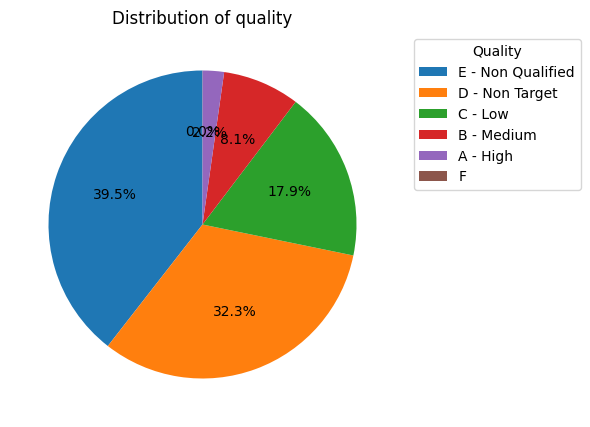

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Quality
plt.pie(quality_distribution, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of quality')
plt.legend(quality_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Quality')

plt.show()


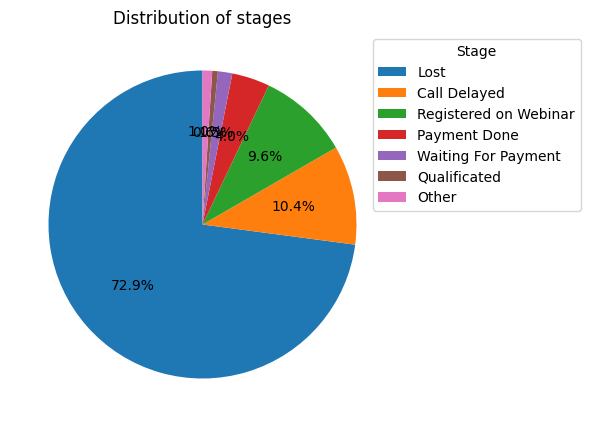

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Quality
plt.pie(stage_distribution, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of stages')
plt.legend(stage_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Stage')

plt.show()

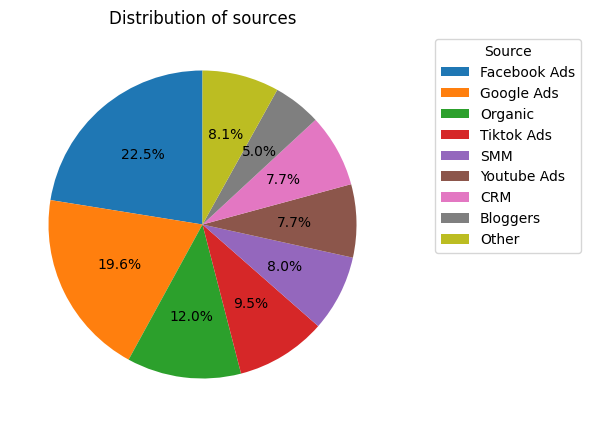

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Quality
plt.pie(source_distribution, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of sources')
plt.legend(source_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Source')

plt.show()

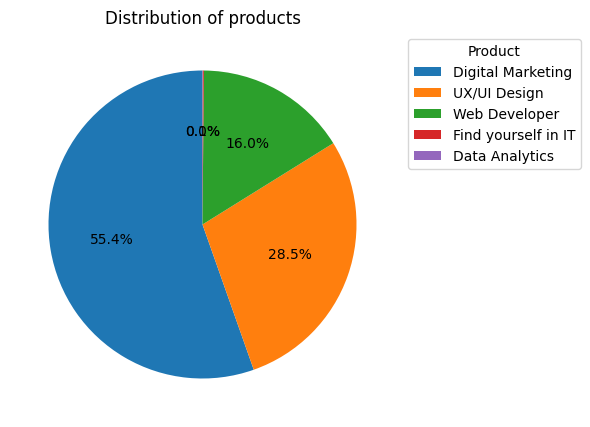

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Quality
plt.pie(product_distribution, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of products')
plt.legend(product_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Product')

plt.show()

# Visualization of categorical field analysis

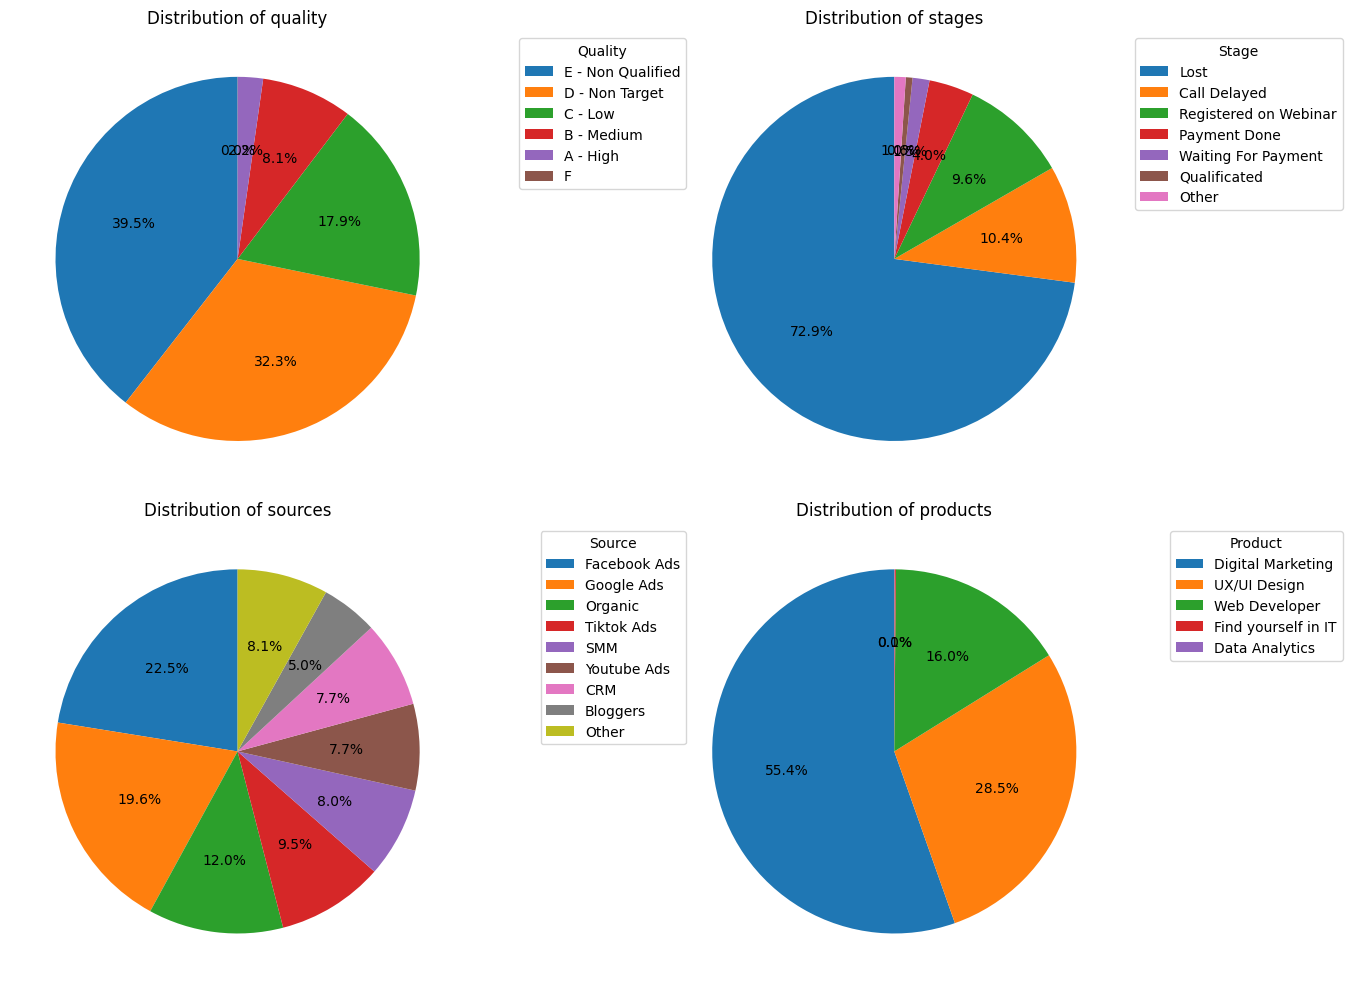

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quality
axes[0, 0].pie(quality_distribution, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of quality')
axes[0, 0].legend(quality_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Quality')

# Stage
axes[0, 1].pie(stage_distribution, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of stages')
axes[0, 1].legend(stage_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Stage')

# Source
axes[1, 0].pie(source_distribution, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of sources')
axes[1, 0].legend(source_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Source')

# Product
axes[1, 1].pie(product_distribution, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of products')
axes[1, 1].legend(product_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Product')

plt.tight_layout()

plt.show()


The pie chart shows the distribution of values by categorical fields.

quality: The majority belong to the categories “low-quality” and “low-quality”, accounting for more than 55% of the total. “High” quality make up the smallest proportion, only 8.7%.

stages: The largest segment is in the “Loss” stage at 34.3%, followed by “Qualified” at 22.9%. The “Waiting for Payment” and “Webinar Registration” stages are less significant at 10.9 % and 9.4 % respectively.

sources: “Facebook Ads” and “Google Ads” dominate the sources, together accounting for 56.1 % of the total. The least significant source is “Organics” with only 6.1 %.

products: 'Digital Marketing' is the leading product, taking 36.2 % of the distribution. In contrast, “Data Analytics” accounts for the smallest share with 6.9 %

We calculate the distribution of categorical values **by Calls**

In [ ]:
call_type_distribution = calls['Call Type'].value_counts(normalize=True) * 100
print("Percentage distribution of Call Type:")
print(call_type_distribution)

Percentage distribution of Call Type:
Call Type
Outbound    90.613722
Missed       6.175814
Inbound      3.210464
Name: proportion, dtype: float64


In [ ]:
outgoing_call_distribution = calls['Outgoing Call Status'].value_counts(normalize=True) * 100
print("Percentage distribution of Outgoing Call Status:")
print(outgoing_call_distribution)

Percentage distribution of Outgoing Call Status:
Outgoing Call Status
Completed      90.527150
Uncompleted     9.386278
Overdue         0.062582
Cancelled       0.020861
Scheduled       0.003129
Name: proportion, dtype: float64


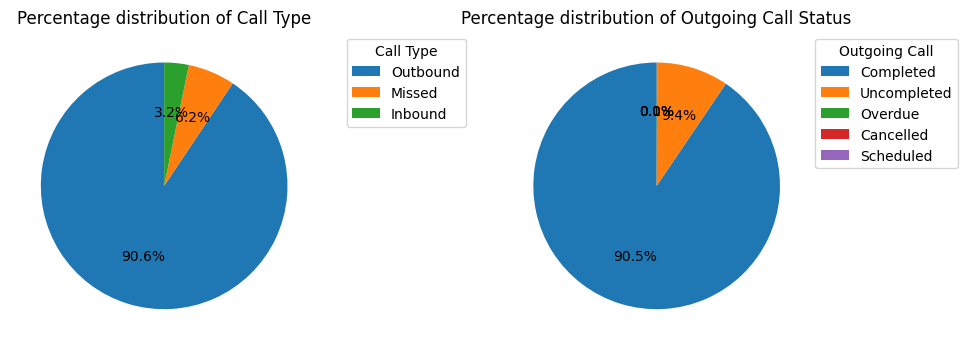

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Call Type
axes[0].pie(call_type_distribution, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Percentage distribution of Call Type')
axes[0].legend(call_type_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Call Type')

# Outgoing Call
axes[1].pie(outgoing_call_distribution, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage distribution of Outgoing Call Status')
axes[1].legend(outgoing_call_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Outgoing Call')

plt.tight_layout()
plt.show()

The pie chart shows the distribution of values across categorical fields.

We calculate the distribution of categorical values **by Spend**


In [ ]:
source_spend_distribution_pre = spend['Source'].value_counts(normalize=True) * 100
print("Percentage distribution of Source:")
print(source_spend_distribution_pre)

Percentage distribution of Source:
Source
Facebook Ads      48.177424
Tiktok Ads        15.028698
Youtube Ads        8.981976
Google Ads         6.373980
Telegram posts     4.209042
Webinar            3.856611
Bloggers           3.181955
SMM                2.874836
Organic            2.587856
CRM                1.787333
Test               1.319102
Partnership        1.178129
Offline            0.307119
Radio              0.135938
Name: proportion, dtype: float64


since there are a lot of categories, which is inconvenient for visualizations, taking into account that some categories have values below 3%, - let's group them in other

In [ ]:
other_categories_source_spend = ['SMM', 'Organic', 'CRM', 'Test', 'Partnership', 'Offline', 'Radio']
other_value_sourse = source_spend_distribution_pre.loc[other_categories_source_spend].sum()

source_spend_distribution = source_spend_distribution_pre.drop(other_categories_source_spend)
source_spend_distribution.loc['Other'] = other_value_sourse

print("Percentage distribution of Sources (with Other category):")
print(source_spend_distribution)

Percentage distribution of Sources (with Other category):
Source
Facebook Ads      48.177424
Tiktok Ads        15.028698
Youtube Ads        8.981976
Google Ads         6.373980
Telegram posts     4.209042
Webinar            3.856611
Bloggers           3.181955
Other             10.190313
Name: proportion, dtype: float64


In [ ]:
campaign_spend_distribution_pre = spend['Campaign'].value_counts(normalize=True) * 100
print("Percentage distribution of Campaign:")
print(campaign_spend_distribution_pre)

Percentage distribution of Campaign:
Campaign
Unknown                    25.561373
wide_DE                    21.382540
recentlymoved_DE            7.038566
youtube_shorts_DE           6.157487
LAL_DE                      5.946028
women                       5.895680
interests_Uxui_DE           5.754707
b_DE                        2.663377
retargeting_DE              2.537509
interests_DE                1.913201
wide_webinar_DE             1.792367
performancemax_eng_DE       1.787333
wide_AT                     1.555735
wide_PL                     1.208338
test_DE                     0.991844
interests_WebDev_PL         0.850871
discovery_DE                0.835767
brand_search_eng_DE         0.735072
youtube_shortsin_AT         0.669620
_widde_PL                   0.649481
women_PL                    0.518578
performancemax_wide_AT      0.468231
wide_gos_DE                 0.402779
web_DE                      0.382640
shorts_PL                   0.367536
interests_WebDev_AT         0

since there are a lot of categories, which is inconvenient for visualizations, taking into account that some categories have values below 5% - let's group them into other, and remove Unknown


In [ ]:
other_categories_campaign_spend = campaign_spend_distribution_pre[campaign_spend_distribution_pre < 5].index
other_value_campaign = campaign_spend_distribution_pre.loc[other_categories_campaign_spend].sum()

campaign_spend_distribution = campaign_spend_distribution_pre.drop(other_categories_campaign_spend)
campaign_spend_distribution.loc['Other'] = other_value_campaign

campaign_spend_distribution = campaign_spend_distribution[campaign_spend_distribution.index != 'Unknown']

print("Percentage distribution of Campaigns (with Other category):")
print(campaign_spend_distribution)

Percentage distribution of Campaigns (with Other category):
Campaign
wide_DE              21.382540
recentlymoved_DE      7.038566
youtube_shorts_DE     6.157487
LAL_DE                5.946028
women                 5.895680
interests_Uxui_DE     5.754707
Other                22.263619
Name: proportion, dtype: float64


In [ ]:
adgroup_spend_distribution_pre = spend['AdGroup'].value_counts(normalize=True) * 100
print("Percentage distribution of AdGroup:")
print(adgroup_spend_distribution_pre)

Percentage distribution of AdGroup:
AdGroup
Unknown                          29.760346
wide                             27.444366
recentlymoved                     7.260095
women                             6.414258
LAL1                              6.142382
Com_august                        5.402276
interest_work_WebDev              3.690464
interest_programming_WebDev       3.202094
b                                 2.849663
retargeting                       2.537509
Com_march                         1.037156
interest_work                     0.911288
Com_july_1                        0.755211
interest_programming              0.609204
promoposts_b                      0.357467
wide_python-developer             0.281945
wide_qa-engineer                  0.251737
berlin_wide                       0.241668
wide_webdesigner                  0.211459
interest_all                      0.181251
interest_python-developer         0.140973
interest_dataanalytics            0.135938
accountant

since there are a lot of categories, which is inconvenient for visualizations, taking into account that some categories have values below 5% - let's group them into other, and remove Unknown


In [ ]:
other_categories_adgroup_spend = adgroup_spend_distribution_pre[adgroup_spend_distribution_pre < 5].index
other_value_adgroup = adgroup_spend_distribution_pre.loc[other_categories_adgroup_spend].sum()

adgroup_spend_distribution = adgroup_spend_distribution_pre.drop(other_categories_adgroup_spend)
adgroup_spend_distribution.loc['Other'] = other_value_campaign

adgroup_spend_distribution = adgroup_spend_distribution[adgroup_spend_distribution.index != 'Unknown']

print("Percentage distribution of AdGroup (with Other category):")
print(adgroup_spend_distribution)

Percentage distribution of AdGroup (with Other category):
AdGroup
wide             27.444366
recentlymoved     7.260095
women             6.414258
LAL1              6.142382
Com_august        5.402276
Other            22.263619
Name: proportion, dtype: float64


In [ ]:
ad_spend_distribution_pre = (spend['Ad'].value_counts(normalize=True) * 100).sort_values(ascending=False)
print("Percentage distribution of Ad:")
print(ad_spend_distribution_pre.head(10))

Percentage distribution of Ad:
Ad
Unknown               29.760346
bloggersvideo9com      3.594804
bloggersvideo5         3.579700
bloggersvideo3com      2.844628
bloggersvideo8com      2.698620
bloggersvideo11        2.527439
v11comwebdev           2.507300
bloggersvideo4com      1.943410
v15                    1.661464
bloggersvideo14com     1.444970
Name: proportion, dtype: float64


very many values - 177, taking into account that the values are mostly distributed in the range of less than 2%, we will not use these data for visualization



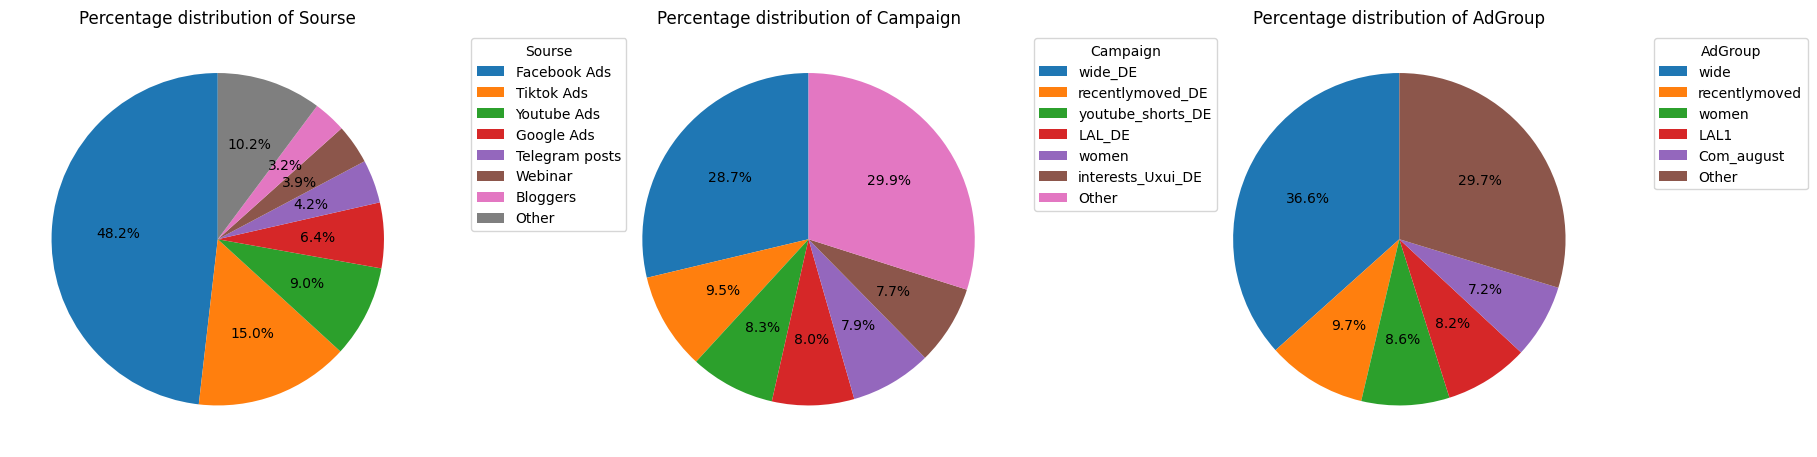

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sourse
axes[0].pie(source_spend_distribution, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Percentage distribution of Sourse')
axes[0].legend(source_spend_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Sourse')

# Campaign
axes[1].pie(campaign_spend_distribution, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage distribution of Campaign')
axes[1].legend(campaign_spend_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='Campaign')

# AdGroup
axes[2].pie(adgroup_spend_distribution, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Percentage distribution of AdGroup')
axes[2].legend(adgroup_spend_distribution.index, loc='upper right', bbox_to_anchor=(1.5, 1), title='AdGroup')

plt.tight_layout()
plt.show()

The pie chart shows the distribution of values across categorical fields.